<a href="https://colab.research.google.com/github/VijayShankar10/Miniproject-team68/blob/main/SpendGenius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from google.colab import files

In [ ]:
data = pd.read_csv("/content/data.csv")
data.head(10)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
5,24875.610267,57,4,Self_Employed,Tier_2,4975.122053,0.000000,1038.230996,3250.067756,1760.164812,...,1478.666359,7599.265300,957.619116,521.683848,135.925865,148.952326,86.567256,13.143683,33.961843,96.675925
6,106119.692762,53,0,Self_Employed,Tier_2,21223.938552,0.000000,4360.202710,12790.390693,6345.738036,...,18399.564592,41595.325723,2799.234658,912.958599,438.009790,541.702363,838.299989,111.857588,0.000000,409.453143
7,55431.341508,40,1,Professional,Tier_2,11086.268302,8307.702220,1755.439820,8194.482410,3353.001888,...,6636.413893,8465.944597,1059.499640,838.163700,466.179258,327.902059,353.411650,92.739538,116.121727,71.520963
8,20606.733121,32,4,Retired,Tier_1,6182.019936,3562.488826,1018.589940,3066.867220,1170.790666,...,362.917872,362.917872,822.974023,212.998059,85.489142,97.812946,252.344383,9.984250,59.957848,80.754353
9,46304.790235,30,1,Student,Tier_2,9260.958047,0.000000,2130.254825,5065.627032,2500.054847,...,5615.104745,15690.256276,962.019888,380.272262,598.882904,188.311642,793.644470,34.873044,39.738841,203.146675


In [ ]:
data.tail(5)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
19995,40913.466178,51,4,Self_Employed,Tier_1,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917
19996,90295.772638,21,1,Student,Tier_2,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,...,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567373,30,1,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817240,27,2,Professional,Tier_1,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212
19999,8209.249769,62,3,Professional,Tier_1,2462.774931,1120.881704,276.376556,969.916908,460.435438,...,531.044006,860.350559,261.160294,124.057428,25.940556,35.238134,94.909265,1.685026,4.837574,12.766302


In [ ]:
# Selecting relevant columns, e.g., 'Disposable_Income' and 'Potential_Savings_Groceries' columns
data['Disposable_Income'] = pd.to_datetime(data['Disposable_Income'])
data = data.set_index('Disposable_Income')
spend_data = data[['Potential_Savings_Groceries']]

In [ ]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(spend_data)

In [ ]:
# Define a function to create sequences from the data
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x), np.array(y)

sequence_length = 12  # 12 months look-back
x, y = create_sequences(scaled_data, sequence_length)

In [ ]:
# Split data into train and test sets
train_size = int(len(x) * 0.8)
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))


# Compile the model with MAE as an additional metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 9.3101e-04 - mae: 0.0195 - val_loss: 8.6581e-04 - val_mae: 0.0177
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 9.8532e-04 - mae: 0.0187 - val_loss: 8.6531e-04 - val_mae: 0.0195
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 8.5803e-04 - mae: 0.0185 - val_loss: 8.6718e-04 - val_mae: 0.0197
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 9.1671e-04 - mae: 0.0188 - val_loss: 8.6545e-04 - val_mae: 0.0195
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 8.8098e-04 - mae: 0.0186 - val_loss: 8.5791e-04 - val_mae: 0.0186
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 9.2785e-04 - mae: 0.0188 - val_loss: 8.6099e-04 - val_mae: 0.0191
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 9.0264e-04 - mae: 0.0187 - val_loss: 8.6301e-04 - val_mae: 0.0178
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0010 - mae: 0.0186 - val_loss: 8.5942e-04 - v

In [ ]:
# Step 6: Plot Loss and MAE over epochs
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

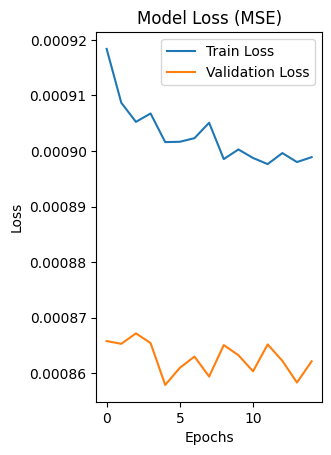

In [ ]:
# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

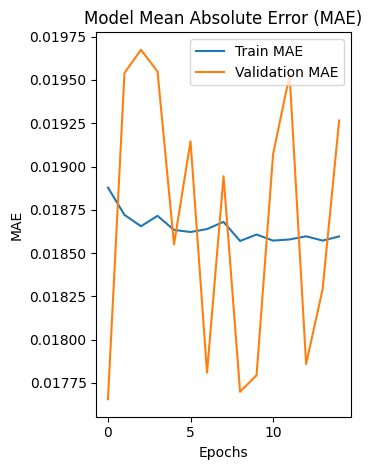

In [ ]:
# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Step 7: Evaluate the Model on Test Data
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.5765e-04 - mae: 0.0193
Test Loss (MSE): 0.0008621603483334184
Test Mean Absolute Error (MAE): 0.019265728071331978


In [ ]:
# Step 8: Make Future Spending Predictions
last_sequence = x_test[-1]
predictions = []
for _ in range(12):  # Forecast for the next 12 months
    prediction = model.predict(np.expand_dims(last_sequence, axis=0))
    predictions.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)

# Transform predictions back to the original scale
future_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


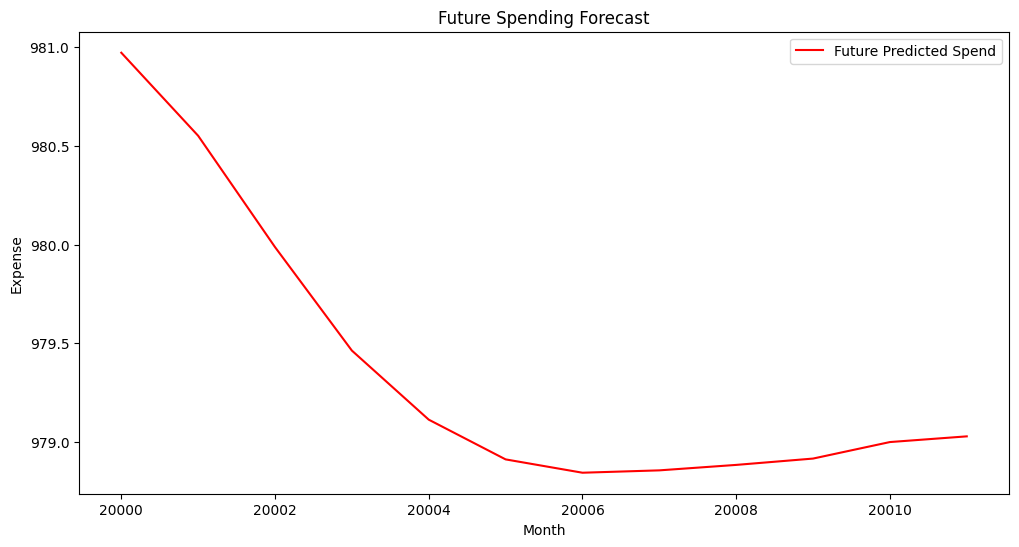

In [ ]:
# Step 9: Plot Future Spending Forecast
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(data), len(data) + 12), future_predictions, color='red', label='Future Predicted Spend')
plt.title('Future Spending Forecast')
plt.xlabel('Month')
plt.ylabel('Expense')
plt.legend()
plt.show()

In [ ]:
# Identify areas for savings based on monthly averages
spending_average = np.mean(scaled_data)
over_spent_months = [i for i, pred in enumerate(future_predictions) if pred > spending_average]

# Print suggestions
for month in over_spent_months:
    print(f"Month {month + 1}: Reduce spending or set savings targets.")


Month 1: Reduce spending or set savings targets.
Month 2: Reduce spending or set savings targets.
Month 3: Reduce spending or set savings targets.
Month 4: Reduce spending or set savings targets.
Month 5: Reduce spending or set savings targets.
Month 6: Reduce spending or set savings targets.
Month 7: Reduce spending or set savings targets.
Month 8: Reduce spending or set savings targets.
Month 9: Reduce spending or set savings targets.
Month 10: Reduce spending or set savings targets.
Month 11: Reduce spending or set savings targets.
Month 12: Reduce spending or set savings targets.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

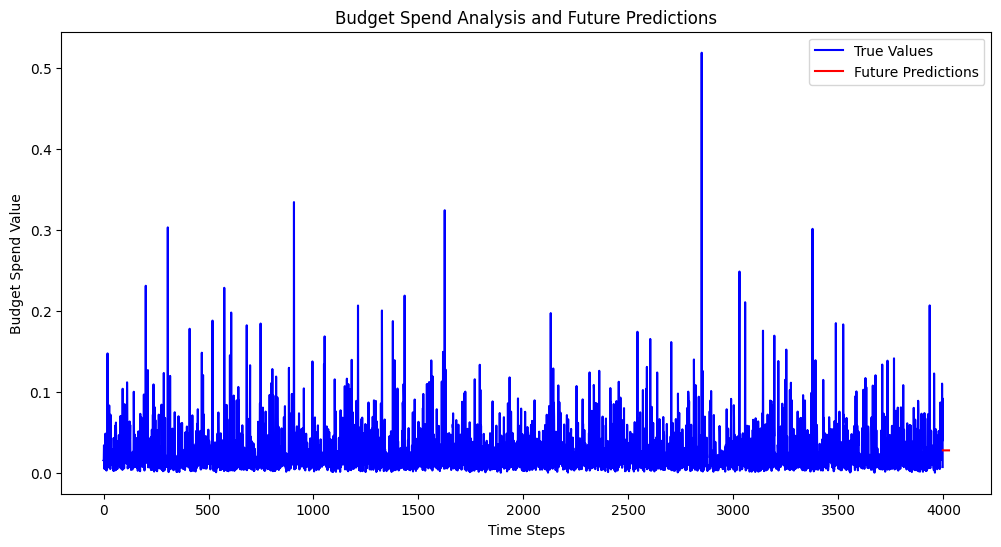

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming x_test is the last batch of input data and has the correct shape for your model
def predict_future(model, last_sequence, future_steps):
    predictions = []
    input_sequence = last_sequence

    for _ in range(future_steps):
        # Make prediction on current sequence
        pred = model.predict(input_sequence.reshape(1, -1, 1))  # Reshape if input is 1D

        # Append prediction to list
        predictions.append(pred[0][0])

        # Append prediction to current sequence for next prediction and remove the oldest value
        input_sequence = np.append(input_sequence[1:], pred)

    return np.array(predictions)

# Parameters
future_steps = 30  # Number of future time steps to predict

# Predict future values
last_sequence = x_test[-1]  # Use the last sequence in your test set as the starting point
future_predictions = predict_future(model, last_sequence, future_steps)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="True Values", color="blue")
plt.plot(range(len(y_test), len(y_test) + future_steps), future_predictions, label="Future Predictions", color="red")
plt.title("Budget Spend Analysis and Future Predictions")
plt.xlabel("Time Steps")
plt.ylabel("Budget Spend Value")
plt.legend()
plt.show()


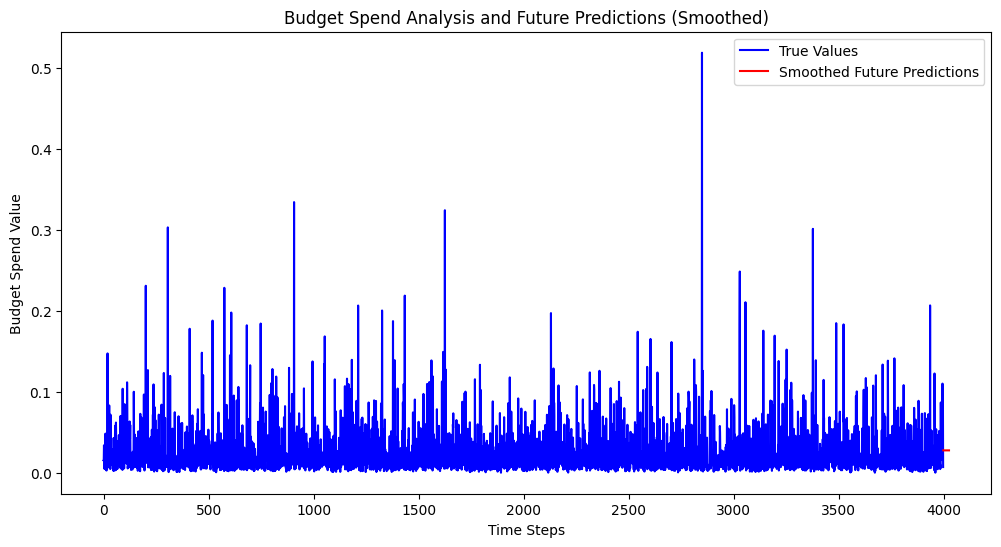

In [ ]:
# Simple moving average smoothing function
def smooth_predictions(predictions, window_size=3):
    return np.convolve(predictions, np.ones(window_size)/window_size, mode='valid')

# Apply smoothing to the predictions
smoothed_predictions = smooth_predictions(future_predictions)

# Plot results with smoothed predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="True Values", color="blue")
plt.plot(range(len(y_test), len(y_test) + len(smoothed_predictions)), smoothed_predictions, label="Smoothed Future Predictions", color="red")
plt.title("Budget Spend Analysis and Future Predictions (Smoothed)")
plt.xlabel("Time Steps")
plt.ylabel("Budget Spend Value")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, model.predict(x_test))
mse = mean_squared_error(y_test, model.predict(x_test))
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Absolute Error: 0.019265735367367334
Mean Squared Error: 0.0008621603687955385
